## Gait Video study 
### Camera caibration 

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path = 'C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\'#1April\\mp4\\'

### Camera 1 - Side-look camera (_0)

In [4]:
# # Run only once to create the frames 
# #Convert videos to frames 
# vid_names = ['5_0_converted'] #'1_0_converted', '2_0_converted', '3_0_converted', '4_part1_0_converted', '4_part2_0_converted', 
# for vid_name in vid_names:
#     vidcap = cv2.VideoCapture(path+vid_name+'.mp4')
#     print (path+vid_name+'.mp4')
#     success,image = vidcap.read()
#     print (success)
# #     print (image)
#     count = 0
#     while success:
# #         print (path+'..\\frames\\vid_name_frame'+str(count)+'.jpg')
#         cv2.imwrite(path+'..\\frames\\sidelook\\'+vid_name+str(count)+'.jpg', image)     # save frame as JPEG file      
#         success,image = vidcap.read()
# #         print('Read a new frame: ', success)
#         count += 1
# #     break

In [202]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((4*6,3), np.float32)
# objp[:,:2] = np.mgrid[0:6,0:4].T.reshape(-1,2)
# objp[:, 0] = objp[:, 0]*3.5 + 3.5
# objp[:, 1] = objp[:, 1]*3.5 + 153.5

objp = np.zeros((4*6,3), np.float32)
objp[:,:2] = np.mgrid[0:4,0:6].transpose(1, 2, 0).reshape(-1,2)
objp[:, 0] = objp[:, 0]*3.5 + 57.5
objp[:, 1] = objp[:, 1]*3.5 + 150
objp[:, 2] = 0

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob(path+'..\\frames\\sidelook\\select4\\*.jpg')

In [203]:
print (objp)

[[ 57.5 150.    0. ]
 [ 57.5 153.5   0. ]
 [ 57.5 157.    0. ]
 [ 57.5 160.5   0. ]
 [ 57.5 164.    0. ]
 [ 57.5 167.5   0. ]
 [ 61.  150.    0. ]
 [ 61.  153.5   0. ]
 [ 61.  157.    0. ]
 [ 61.  160.5   0. ]
 [ 61.  164.    0. ]
 [ 61.  167.5   0. ]
 [ 64.5 150.    0. ]
 [ 64.5 153.5   0. ]
 [ 64.5 157.    0. ]
 [ 64.5 160.5   0. ]
 [ 64.5 164.    0. ]
 [ 64.5 167.5   0. ]
 [ 68.  150.    0. ]
 [ 68.  153.5   0. ]
 [ 68.  157.    0. ]
 [ 68.  160.5   0. ]
 [ 68.  164.    0. ]
 [ 68.  167.5   0. ]]


In [204]:
len(images)

11

C:\Users\purpl\Box\Gait Video Project\CameraCalibration\1April\mp4\..\frames\sidelook\select4\1_0_converted3863.jpg
[[[350.68048   41.90652 ]]

 [[351.35928   54.59489 ]]

 [[351.63745   68.26323 ]]

 [[352.10672   81.32198 ]]

 [[352.44565   94.59104 ]]

 [[353.02795  108.41958 ]]

 [[337.21936   42.251587]]

 [[337.08026   55.43844 ]]

 [[337.59116   68.62457 ]]

 [[337.9561    82.211494]]

 [[338.33243   95.38585 ]]

 [[338.58978  108.80559 ]]

 [[322.7453    42.739082]]

 [[323.28757   56.127865]]

 [[323.5158    69.16539 ]]

 [[323.8352    82.58015 ]]

 [[324.09567   95.83426 ]]

 [[324.57748  109.26861 ]]

 [[309.07034   43.32503 ]]

 [[309.21265   56.433765]]

 [[309.50784   69.40282 ]]

 [[309.72168   82.737114]]

 [[309.8971    96.36177 ]]

 [[310.3031   109.704834]]]
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\1April\mp4\..\frames\sidelook\select4\2_0_converted1003.jpg
[[[265.61664   94.2631  ]]

 [[278.84134   94.147446]]

 [[291.18362   93.19752 ]]

 [[305.5976 

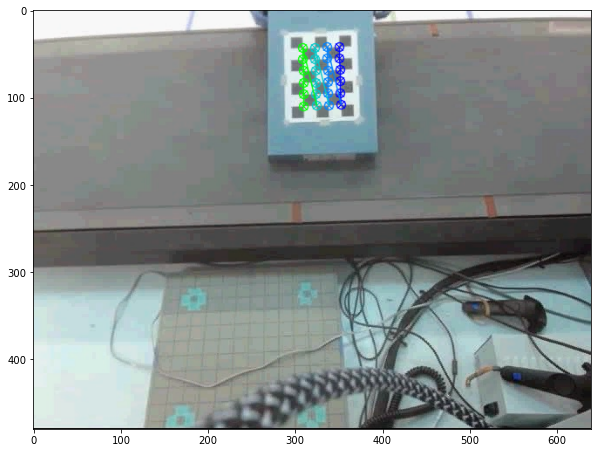

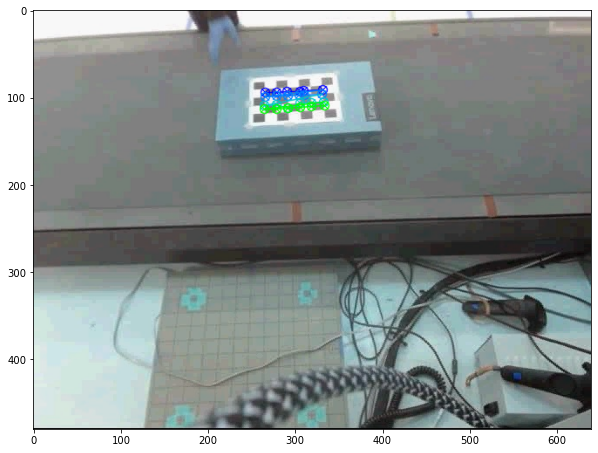

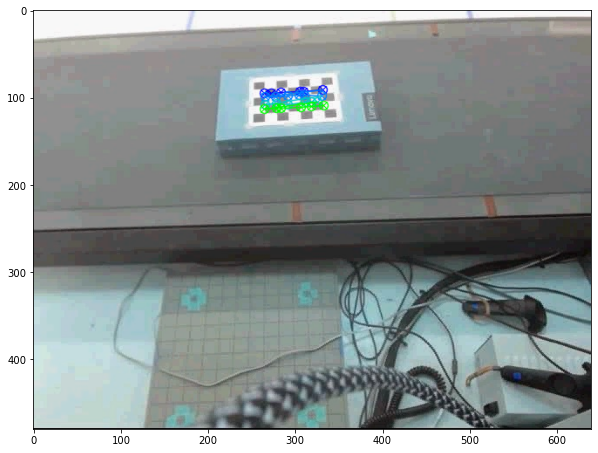

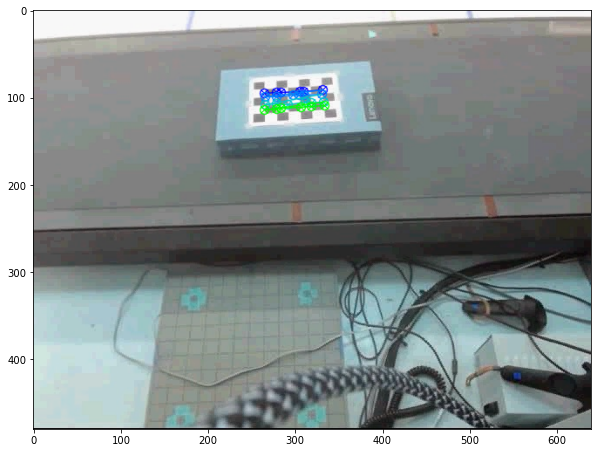

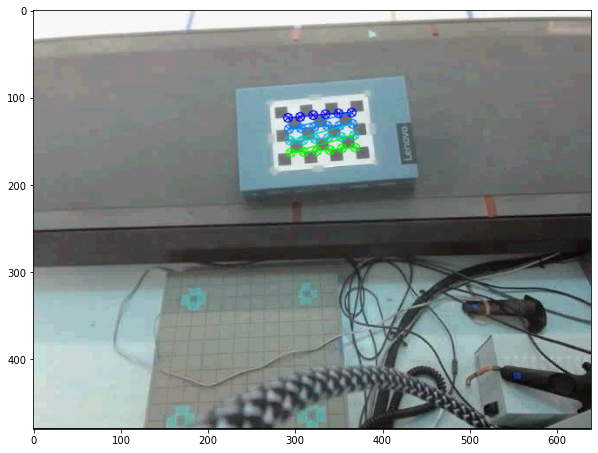

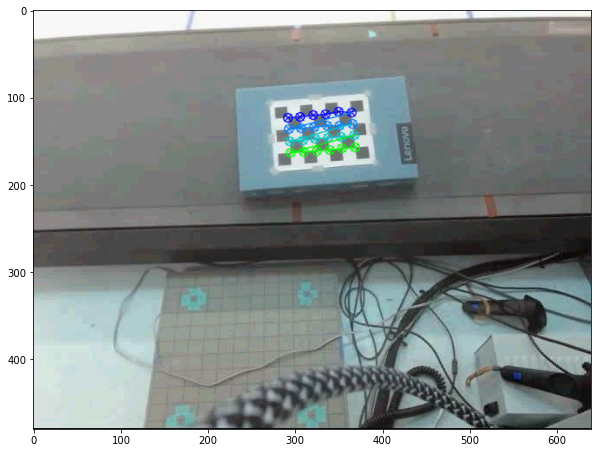

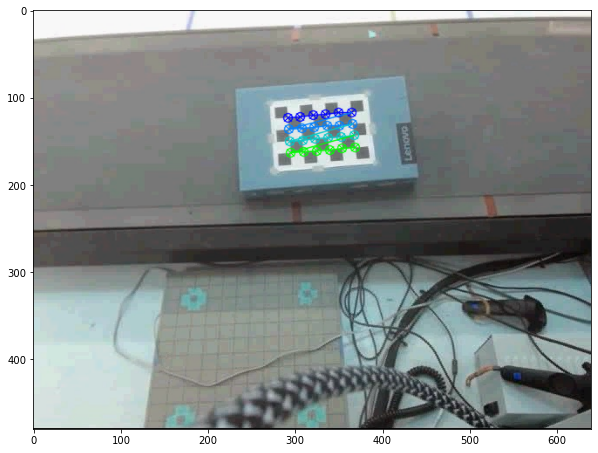

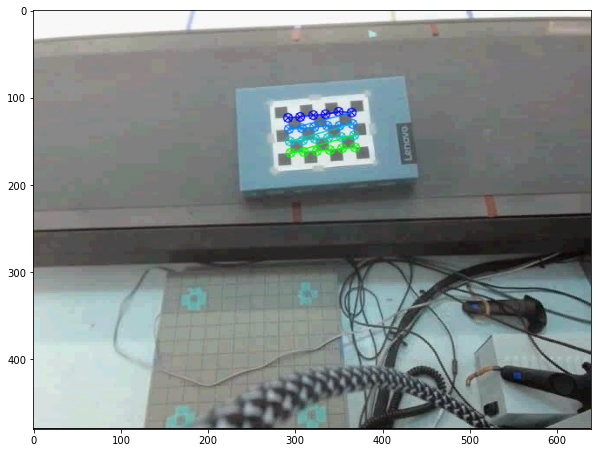

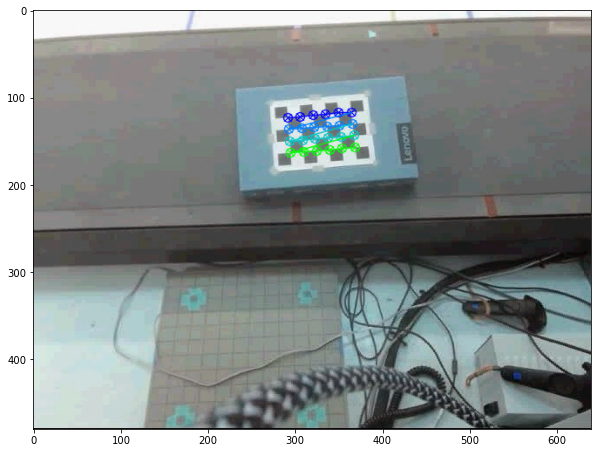

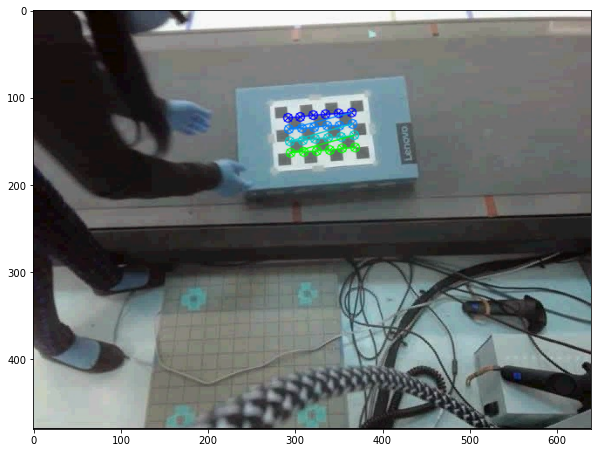

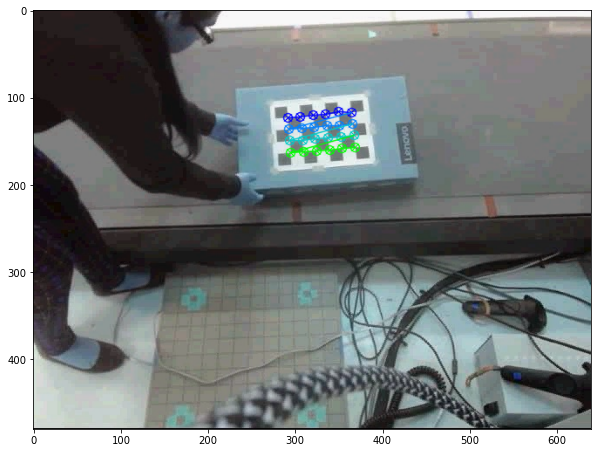

In [205]:
for fname in images: #35 selected images in total
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (6,4),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        print (fname)
        fig = plt.figure(figsize=(10, 10))
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (6,4), corners2,ret)
        print (corners2)
        plt.imshow(img)
        fig.savefig(fname[:-4]+'_calibrate.png', dpi = 300, bbox_inches='tight', pad_inches=0)
#         plt.close()

In [206]:
len(objpoints), len(imgpoints)

(11, 11)

In [207]:
imgpoints

[array([[[350.68048 ,  41.90652 ]],
 
        [[351.35928 ,  54.59489 ]],
 
        [[351.63745 ,  68.26323 ]],
 
        [[352.10672 ,  81.32198 ]],
 
        [[352.44565 ,  94.59104 ]],
 
        [[353.02795 , 108.41958 ]],
 
        [[337.21936 ,  42.251587]],
 
        [[337.08026 ,  55.43844 ]],
 
        [[337.59116 ,  68.62457 ]],
 
        [[337.9561  ,  82.211494]],
 
        [[338.33243 ,  95.38585 ]],
 
        [[338.58978 , 108.80559 ]],
 
        [[322.7453  ,  42.739082]],
 
        [[323.28757 ,  56.127865]],
 
        [[323.5158  ,  69.16539 ]],
 
        [[323.8352  ,  82.58015 ]],
 
        [[324.09567 ,  95.83426 ]],
 
        [[324.57748 , 109.26861 ]],
 
        [[309.07034 ,  43.32503 ]],
 
        [[309.21265 ,  56.433765]],
 
        [[309.50784 ,  69.40282 ]],
 
        [[309.72168 ,  82.737114]],
 
        [[309.8971  ,  96.36177 ]],
 
        [[310.3031  , 109.704834]]], dtype=float32),
 array([[[265.61664 ,  94.2631  ]],
 
        [[278.84134 ,  94.147446]],

### Computing the intrinsic camera parameters (camera matrix and distortion matrix)

In [208]:
objpoints

[array([[ 57.5, 150. ,   0. ],
        [ 57.5, 153.5,   0. ],
        [ 57.5, 157. ,   0. ],
        [ 57.5, 160.5,   0. ],
        [ 57.5, 164. ,   0. ],
        [ 57.5, 167.5,   0. ],
        [ 61. , 150. ,   0. ],
        [ 61. , 153.5,   0. ],
        [ 61. , 157. ,   0. ],
        [ 61. , 160.5,   0. ],
        [ 61. , 164. ,   0. ],
        [ 61. , 167.5,   0. ],
        [ 64.5, 150. ,   0. ],
        [ 64.5, 153.5,   0. ],
        [ 64.5, 157. ,   0. ],
        [ 64.5, 160.5,   0. ],
        [ 64.5, 164. ,   0. ],
        [ 64.5, 167.5,   0. ],
        [ 68. , 150. ,   0. ],
        [ 68. , 153.5,   0. ],
        [ 68. , 157. ,   0. ],
        [ 68. , 160.5,   0. ],
        [ 68. , 164. ,   0. ],
        [ 68. , 167.5,   0. ]], dtype=float32),
 array([[ 57.5, 150. ,   0. ],
        [ 57.5, 153.5,   0. ],
        [ 57.5, 157. ,   0. ],
        [ 57.5, 160.5,   0. ],
        [ 57.5, 164. ,   0. ],
        [ 57.5, 167.5,   0. ],
        [ 61. , 150. ,   0. ],
        [ 61. , 153.5,

In [209]:
#Calculating the Camera matrix and Distortion matrix 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

# # #Saving as .npy files 
# np.save(path+'..\\frames\\sidelook\\calibrate\\sidelook_camera_matrix', mtx)
# np.save(path+'..\\frames\\sidelook\\calibrate\\sidelook_distortion_matrix', dist)


In [186]:
# Load previously saved data
# sidelook_mtx = np.load(path+'..\\frames\\sidelook\\calibrate\\sidelook_camera_matrix.npy')
# sidelook_dist = np.load(path+'..\\frames\\sidelook\\calibrate\\sidelook_distortion_matrix.npy')

In [133]:
sidelook_mtx, sidelook_dist

NameError: name 'sidelook_mtx' is not defined

In [210]:
mtx, dist

(array([[1.12162880e+03, 0.00000000e+00, 3.15949830e+02],
        [0.00000000e+00, 1.69676687e+03, 2.38433315e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-9.81094785e+00,  3.07410723e+02, -4.77409062e-01,
          1.25709757e-01,  7.37722582e+00]]))

In [211]:
#Re-projection error gives a good estimation of just how exact is the found parameters. 
#This should be as close to zero as possible.
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    print(error)
    mean_error += error

print ("total error: ", mean_error/len(objpoints))

0.04521032724695514
0.5336864198917476
0.757832252069258
0.7793559776090316
0.050864259737455404
0.0786880640425937
0.07698309664911072
0.07734097415438616
0.07544352521217165
0.04437110863674481
0.08427465508905863
total error:  0.23673187821259212


### Computing the extrinsic camera parameters (rotation and translation matrix)

In [212]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [213]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((24, 3), np.float32)
objp[:,:2] = np.mgrid[0:4,0:6].transpose(1, 2, 0).reshape(-1,2)
objp[:, 0] = objp[:, 0]*3.5 + 59
objp[:, 1] = objp[:, 1]*3.5 + 150
objp[:, 2] = 7

corners = np.zeros((12, 2), np.float32)

# axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axis = np.float32([[ 59+14, 150, 7], [ 59, 150+14, 7], [59, 150, 7-14]]).reshape(-1,3) #3 boxes each of 3.5*3.5
#zeros for x: 66, zero for y: 150, zero for z: 7 but block size is 3.5 ; 
#so (3, 0, 0) = (14, 164, 0); (0, 3, 0) = (3.5, 153.5, 0); (0, 0, -3) = (3.5, 164, -10.5)

In [219]:
#From the 2D green object 
objp = np.zeros((12, 3), np.float32)
corners = np.zeros((12, 2), np.float32)
objp[0] = [0, 150, 0]
corners[0] = [300, 17]

objp[1] = [0, 170, 0]
corners[1] = [361, 18]

objp[2] = [20, 150, 0]
corners[2] = [300, 61]

objp[3] = [20, 170, 0]
corners[3] = [365, 59]

#From the 2D green object on the other side 
objp[4] = [87, 150, 0]
corners[4] = [300, 242]

objp[5] = [87, 170, 0]
corners[5] = [382, 240]

objp[6] = [67, 170, 0]
corners[6] = [375, 175]

objp[7] = [67, 150, 0]
corners[7] = [298, 177]

# From the 3D green object 
objp[8] = [87, 150, 25]
corners[8] = [292, 171]

objp[9] = [87, 170, 25]
corners[9] = [392, 168]

objp[10] = [67, 170, 25]
corners[10] = [383, 99]

objp[11] = [67, 150, 25]
corners[11] = [292, 101]

In [175]:
corners, objp

(array([[300.,  17.],
        [361.,  18.],
        [300.,  61.],
        [365.,  59.],
        [300., 242.],
        [382., 240.],
        [375., 175.],
        [298., 177.],
        [292., 171.],
        [392., 168.],
        [383.,  99.],
        [292., 101.]], dtype=float32),
 array([[  0., 150.,   0.],
        [  0., 170.,   0.],
        [ 20., 150.,   0.],
        [ 20., 170.,   0.],
        [ 87., 150.,   0.],
        [ 87., 170.,   0.],
        [ 67., 170.,   0.],
        [ 67., 150.,   0.],
        [ 87., 150.,  25.],
        [ 87., 170.,  25.],
        [ 67., 170.,  25.],
        [ 67., 150.,  25.]], dtype=float32))

In [214]:
images2 = glob.glob(path+'..\\frames\\sidelook\\select3\\*.jpg')

In [215]:
images2

['C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\1April\\mp4\\..\\frames\\sidelook\\select3\\2_0_converted2971.jpg',
 'C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\1April\\mp4\\..\\frames\\sidelook\\select3\\2_0_converted3150.jpg',
 'C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\1April\\mp4\\..\\frames\\sidelook\\select3\\2_0_converted3300.jpg',
 'C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\1April\\mp4\\..\\frames\\sidelook\\select3\\2_0_converted3510.jpg',
 'C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\1April\\mp4\\..\\frames\\sidelook\\select3\\2_0_converted3691.jpg',
 'C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\1April\\mp4\\..\\frames\\sidelook\\select3\\2_0_converted3861.jpg',
 'C:\\Users\\purpl\\Box\\Gait Video Project\\CameraCalibration\\1April\\mp4\\..\\frames\\sidelook\\select3\\2_0_converted3871.jpg']

In [216]:
mtx, dist

(array([[1.12162880e+03, 0.00000000e+00, 3.15949830e+02],
        [0.00000000e+00, 1.69676687e+03, 2.38433315e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-9.81094785e+00,  3.07410723e+02, -4.77409062e-01,
          1.25709757e-01,  7.37722582e+00]]))

[[[291.9464   122.84971 ]]

 [[306.29092  121.68776 ]]

 [[321.0042   120.33604 ]]

 [[335.32095  119.370834]]

 [[349.89246  117.55018 ]]

 [[364.5382   117.079636]]

 [[292.8462   136.36745 ]]

 [[307.44083  134.95833 ]]

 [[322.3371   133.95871 ]]

 [[336.80295  132.4535  ]]

 [[351.36563  131.65643 ]]

 [[365.9895   130.24586 ]]

 [[294.15738  149.49443 ]]

 [[308.73215  148.60596 ]]

 [[323.38293  147.3743  ]]

 [[338.00323  146.34647 ]]

 [[352.82474  144.86633 ]]

 [[367.56735  143.42178 ]]

 [[294.93338  163.34097 ]]

 [[309.83292  161.68542 ]]

 [[324.6691   160.61389 ]]

 [[339.58807  159.68073 ]]

 [[354.3805   158.2015  ]]

 [[369.08243  157.21565 ]]] [[ 59.  150.    7. ]
 [ 59.  153.5   7. ]
 [ 59.  157.    7. ]
 [ 59.  160.5   7. ]
 [ 59.  164.    7. ]
 [ 59.  167.5   7. ]
 [ 62.5 150.    7. ]
 [ 62.5 153.5   7. ]
 [ 62.5 157.    7. ]
 [ 62.5 160.5   7. ]
 [ 62.5 164.    7. ]
 [ 62.5 167.5   7. ]
 [ 66.  150.    7. ]
 [ 66.  153.5   7. ]
 [ 66.  157.    7. ]
 [ 66.  160.5

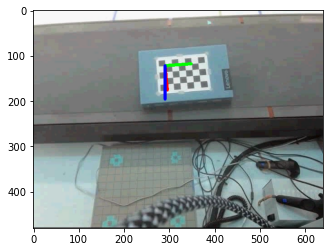

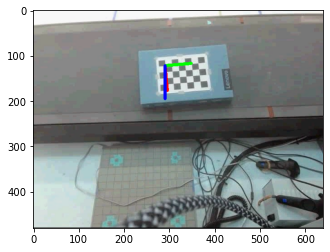

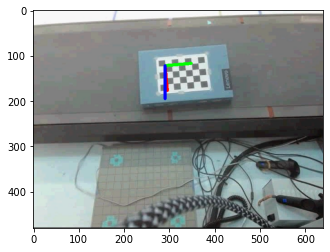

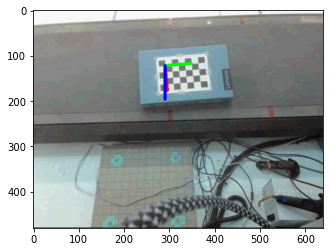

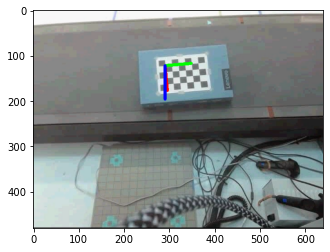

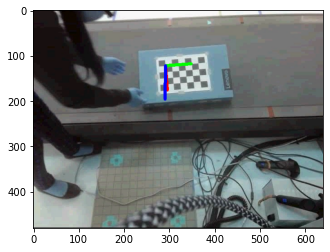

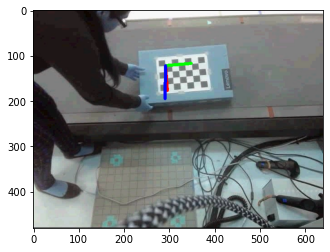

In [217]:
for fname in images2:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (6,4),None)
#     print (corners)

    if ret == True:
        plt.figure()
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
#         print ('corners2', corners2)
        # Find the rotation and translation vectors.
        print (corners2, objp)
        _, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        print (rvecs, tvecs)
        #Post processing to check 
        rotM = cv2.Rodrigues(rvecs)[0]
#         print (rotM)
        cameraPosition = -np.matrix(rotM).T * np.matrix(tvecs)
        print ('Camera Position', cameraPosition)
#         print ('inliers', inliers)

        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
#         print(img)
#         print (corners2)
#         print ('img', imgpts)
#         print ('axis', axis)
        
        img = draw(img,corners2,imgpts)
        plt.imshow(img)
        plt.savefig(fname[:-4]+'_axis.png', dpi = 300, bbox_inches='tight', pad_inches=0)
        #plt.close()

In [220]:
_, rvecs, tvecs = cv2.solvePnP(objp, corners, mtx, dist)
print (rvecs, tvecs)
#Post processing to check 
rotM = cv2.Rodrigues(rvecs)[0]
#         print (rotM)
cameraPosition = -np.matrix(rotM).T * np.matrix(tvecs)
print ('Camera Position', cameraPosition)

[[ 1.73841189]
 [ 1.68151779]
 [-0.75697803]] [[-155.02367019]
 [ -51.94995631]
 [ 445.79482082]]
Camera Position [[374.889755  ]
 [140.31039594]
 [255.41108617]]


In [999]:
# #Saving as .npy files 
np.save(path+'..\\frames\\sidelook\\calibrate\\sidelook_rotation_matrix', rvecs)
np.save(path+'..\\frames\\sidelook\\calibrate\\sidelook_translation_matrix', tvecs)


In [82]:
# Load previously saved data
sidelook_rvecs = np.load(path+'..\\frames\\sidelook\\calibrate\\sidelook_rotation_matrix.npy')
sidelook_tvecs = np.load(path+'..\\frames\\sidelook\\calibrate\\sidelook_translation_matrix.npy')

In [6]:
print ('Computed rotation vector', sidelook_rvecs)
print ('Computed translation vector', sidelook_tvecs)

Computed rotation vector [[ 2.04933399]
 [ 2.01845012]
 [-0.45984963]]
Computed translation vector [[-152.59950346]
 [ -79.890171  ]
 [ 121.21852086]]


In [7]:
#Post processing to check 
rotM = cv2.Rodrigues(sidelook_rvecs)[0]
print (rotM)
cameraPosition = -np.matrix(rotM).T * np.matrix(sidelook_tvecs)
print (cameraPosition)

[[ 0.00302692  0.99805993 -0.06218696]
 [ 0.92650382 -0.02619853 -0.37537223]
 [-0.37627319 -0.05648023 -0.92478564]]
[[120.09173368]
 [157.05689452]
 [ 72.6228963 ]]


In [9]:
sidelook_mtx

array([[333.99061135,   0.        , 307.68583952],
       [  0.        , 342.21519289, 248.6607367 ],
       [  0.        ,   0.        ,   1.        ]])

In [92]:
w = 640
h = 480
col, row = 292., 172 #300, 17 # 292., 172.  #293, 102 #122.747635  #292.234, 120 #306.29224, 121.75887#292.234, 122.80032 #292.234, 20# 306.29224, 121.75887 #
u=col-w/2
v=h/2-row
p = np.matmul(np.linalg.pinv(sidelook_mtx), np.array([col, row, 1]))
print (p.reshape(-1,1))
p1 = p*[0.15*sidelook_mtx[0, 0], 0.2*sidelook_mtx[1, 1], 0.15*sidelook_mtx[0, 0]] #At height 25
#constant = 55 at height 25
# p1 = 55*p #At height 25
p2 = p*[0.33*sidelook_mtx[0, 0], 0.33*sidelook_mtx[1, 1], 0.33*sidelook_mtx[0, 0]] #At height 0
#constant = 109 at height 0 
# p2 = 109*p
print (p1)

[[-0.04696491]
 [-0.22401325]
 [ 1.        ]]
[ -2.35287593 -15.33214734  50.0985917 ]


In [93]:
scale_z_0_on_treadmill = 37 + 72.6 #treadmill_height + camera's height 
scale_z_25_on_treadmill = 37 + 72.6 - 25 

In [94]:
scale_z_0_on_treadmill, scale_z_25_on_treadmill

(109.6, 84.6)

In [95]:
sidelook_mtx

array([[333.99061135,   0.        , 307.68583952],
       [  0.        , 342.21519289, 248.6607367 ],
       [  0.        ,   0.        ,   1.        ]])

In [96]:
p.T

array([-0.04696491, -0.22401325,  1.        ])

In [97]:
np.matmul(np.matrix(rotM).T, (p.reshape(-1,1) - np.matrix(sidelook_tvecs)))

matrix([[119.5077692 ],
        [156.95940931],
        [ 71.78511962]])

In [98]:
np.matmul(np.matrix(rotM).T, (p1.reshape(-1,1) - np.matrix(sidelook_tvecs)))

matrix([[ 87.02856186],
        [152.28068295],
        [ 32.19401887]])

In [99]:
np.matmul(np.matrix(rotM).T, (p2.reshape(-1,1) - np.matrix(sidelook_tvecs)))

matrix([[ 55.16566685],
        [146.32830518],
        [-19.48602832]])

In [1121]:
np.matmul(np.matrix(rotM).T, (55*p.reshape(-1,1) - np.matrix(sidelook_tvecs)))


matrix([[ 87.82528051],
        [151.86377426],
        [ 26.59526726]])

In [20]:
np.matmul(np.matrix(rotM).T, (55*p.reshape(-1,1) - np.matrix(sidelook_tvecs)))


matrix([[ 87.9736875 ],
        [151.69520789],
        [ 26.545179  ]])

In [1124]:
87.97-87.82

0.15000000000000568

### Camera 2 - Front-look camera (_1)

In [49]:
#Run only once to create the frames 
# #Convert videos to frames 
# vid_names = ['June_1_converted'] #'1_1_converted', '2_1_converted', '3_1_converted', '4_part1_1_converted', '4_part2_1_converted',
# for vid_name in vid_names:
#     vidcap = cv2.VideoCapture(path+vid_name+'.mp4')
# #     print (path+vid_name+'.mp4')
#     success,image = vidcap.read()
# #     print (image)
#     count = 0
#     while success:
# #         print (path+'..\\frames\\vid_name_frame'+str(count)+'.jpg')
#         cv2.imwrite(path+'June\\sidelook\\'+vid_name+str(count)+'.jpg', image)     # save frame as JPEG file      
#         success,image = vidcap.read()
# #         print('Read a new frame: ', success)
#         count += 1
# #     break

In [50]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((4*6,3), np.float32)
# objp[:,:2] = np.mgrid[0:6,0:4].T.reshape(-1,2)
# objp[:, 0] = objp[:, 0]*3.5 + 3.5
# objp[:, 1] = objp[:, 1]*3.5 + 153.5

objp_front = np.zeros((4*6,3), np.float32)
objp_front[:, 0:2] = np.mgrid[0:6,0:4].T.reshape(-1,2) #np.mgrid[0:4,0:6].transpose(1, 2, 0).reshape(-1,2)
objp_front[:, 0] = 43.5 - objp_front[:, 0]*3.5 
objp_front[:, 1] = 250 + objp_front[:, 1]*3.5
objp_front[:, 2] = 0

# Arrays to store object points and image points from all the images.
objpoints_front = [] # 3d point in real world space
imgpoints_front = [] # 2d points in image plane.

images_front = glob.glob(path+'June\\frontlook\\select\\*.jpg')
# print (objp_front)
# print (len(images_front))

In [51]:
for fname in images_front: #35 selected images in total
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (6,4),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
#         print (fname)
        fig = plt.figure(figsize=(10, 10))
        objpoints_front.append(objp_front)

        corners2 = cv2.cornerSubPix(gray,corners,(8,8),(-1,-1),criteria)
        imgpoints_front.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (6,4), corners2,ret)
#         print (corners2)
        plt.imshow(img)
        fig.savefig(fname[:-4]+'_calibrate.png', dpi = 300, bbox_inches='tight', pad_inches=0)
        plt.close()
    else:
        print (fname)
print (len(objpoints_front), len(imgpoints_front))
# print (imgpoints_front)
# print (objpoints_front)

17 17


In [52]:
print (images_front[-1])
print (imgpoints_front[-1])


C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted4499.jpg
[[[446.41367 344.8498 ]]

 [[462.27502 344.3726 ]]

 [[477.7962  343.62238]]

 [[493.85233 342.90506]]

 [[510.10904 342.3603 ]]

 [[526.4368  341.87018]]

 [[447.3339  357.6188 ]]

 [[463.24542 356.74002]]

 [[479.62885 356.2526 ]]

 [[495.67947 355.73767]]

 [[512.40375 355.36862]]

 [[529.022   354.57608]]

 [[447.66025 370.68378]]

 [[464.22388 370.33984]]

 [[480.8332  369.7888 ]]

 [[497.79758 369.31754]]

 [[514.76984 368.76474]]

 [[531.78174 368.37067]]

 [[448.31265 384.81796]]

 [[465.42114 384.2223 ]]

 [[482.30902 383.6785 ]]

 [[499.74982 383.35916]]

 [[517.17365 382.7329 ]]

 [[534.9582  382.4507 ]]]


In [53]:
print (objpoints_front[-2])

[[ 43.5 250.    0. ]
 [ 40.  250.    0. ]
 [ 36.5 250.    0. ]
 [ 33.  250.    0. ]
 [ 29.5 250.    0. ]
 [ 26.  250.    0. ]
 [ 43.5 253.5   0. ]
 [ 40.  253.5   0. ]
 [ 36.5 253.5   0. ]
 [ 33.  253.5   0. ]
 [ 29.5 253.5   0. ]
 [ 26.  253.5   0. ]
 [ 43.5 257.    0. ]
 [ 40.  257.    0. ]
 [ 36.5 257.    0. ]
 [ 33.  257.    0. ]
 [ 29.5 257.    0. ]
 [ 26.  257.    0. ]
 [ 43.5 260.5   0. ]
 [ 40.  260.5   0. ]
 [ 36.5 260.5   0. ]
 [ 33.  260.5   0. ]
 [ 29.5 260.5   0. ]
 [ 26.  260.5   0. ]]


### Computing the intrinsic camera parameters (camera matrix and distortion matrix)

In [54]:
# objpoints_frontg the Camera matrix and Distortion matrix 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints_front, imgpoints_front, gray.shape[::-1],None,None)

# #Saving as .npy files 
np.save(path+'June\\frontlook\\calibrate\\frontlook_camera_matrix', mtx)
np.save(path+'June\\frontlook\\calibrate\\frontlook_distortion_matrix', dist)

# # Load previously saved data
frontlook_mtx = np.load(path+'June\\frontlook\\calibrate\\frontlook_camera_matrix.npy')
frontlook_dist = np.load(path+'June\\frontlook\\calibrate\\frontlook_distortion_matrix.npy')

In [55]:
print ('Computed camera matrix', frontlook_mtx)
print ('Computed distortion matrix', frontlook_dist)

Computed camera matrix [[560.02665252   0.         402.60078829]
 [  0.         869.92913382 252.54590069]
 [  0.           0.           1.        ]]
Computed distortion matrix [[-4.70342049e-01  9.05259576e+00  4.59566683e-03  2.16735826e-02
  -5.32980337e+01]]


In [56]:
#Re-projection error gives a good estimation of just how exact is the found parameters. 
#This should be as close to zero as possible.
mean_error = 0
for i in range(len(objpoints_front)):
    print (images_front[i])
    imgpoints2_front, _ = cv2.projectPoints(objpoints_front[i], rvecs[i], tvecs[i], frontlook_mtx, frontlook_dist)
    error = cv2.norm(imgpoints_front[i],imgpoints2_front, cv2.NORM_L2)/len(imgpoints2_front)
    print(error)
    mean_error += error
print ("total error: ", mean_error/len(objpoints_front))

C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted115.jpg
0.3644787704127698
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted262.jpg
0.39319650608705786
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted303.jpg
0.39002857333674784
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted310.jpg
0.36601662282257186
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted4269.jpg
0.12488731104923394
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted4292.jpg
0.09614862230914516
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted4332.jpg
0.03173813114273406
C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select\June_1_converted4334.jpg
0.031177784253657925
C:\Users\purpl\Box\G

### Computing the extrinsic camera parameters (rotation and translation matrix)

In [57]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [389]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp_front = np.zeros((24, 3), np.float32)
objp_front[:,0:2] = np.mgrid[0:6,0:4].T.reshape(-1,2) 
#np.mgrid[0:4,0:6].transpose(1, 2, 0).reshape(-1,2)
objp_front[:, 0] = 43.5 - objp_front[:, 0]*3.5
objp_front[:, 1] = 280+ objp_front[:, 1]*3.5
objp_front[:, 2] = [-25]*6 + [-22]*6 + [-19]*6 + [-16]*6 #list(20+x) + list(19+x) + list(18+x) +  list(17+x)
corners_front = np.zeros((12, 2), np.float32)

# axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axis = np.float32([[ 43.5-14, 280, -25], [ 43.5, 280+14,-25], [43.5, 280, -25-14]]).reshape(-1,3) #3 boxes each of 3.5*3.5
#zeros for x: 66, zero for y: 150, zero for z: 7 but block size is 3.5 ; 
#so (3, 0, 0) = (14, 164, 0); (0, 3, 0) = (3.5, 153.5, 0); (0, 0, -3) = (3.5, 164, -10.5)

In [390]:
x = np.array([0.1, 0.11, 0.12, 0.13, 0.14, 0.15])

In [391]:
20+x

array([20.1 , 20.11, 20.12, 20.13, 20.14, 20.15])

In [392]:
objp_front

array([[ 43.5, 280. , -25. ],
       [ 40. , 280. , -25. ],
       [ 36.5, 280. , -25. ],
       [ 33. , 280. , -25. ],
       [ 29.5, 280. , -25. ],
       [ 26. , 280. , -25. ],
       [ 43.5, 283.5, -22. ],
       [ 40. , 283.5, -22. ],
       [ 36.5, 283.5, -22. ],
       [ 33. , 283.5, -22. ],
       [ 29.5, 283.5, -22. ],
       [ 26. , 283.5, -22. ],
       [ 43.5, 287. , -19. ],
       [ 40. , 287. , -19. ],
       [ 36.5, 287. , -19. ],
       [ 33. , 287. , -19. ],
       [ 29.5, 287. , -19. ],
       [ 26. , 287. , -19. ],
       [ 43.5, 290.5, -16. ],
       [ 40. , 290.5, -16. ],
       [ 36.5, 290.5, -16. ],
       [ 33. , 290.5, -16. ],
       [ 29.5, 290.5, -16. ],
       [ 26. , 290.5, -16. ]], dtype=float32)

In [393]:
# #From the 2D green object 
# objp_front = np.zeros((12, 3), np.float32)
# corners_front = np.zeros((12, 2), np.float32)

# objp_front[0] = [0, 150, 0]
# corners_front[0] = [486, 272]

# objp_front[1] = [0, 170, 0]
# corners_front[1] = [494, 282]

# objp_front[2] = [20, 150, 0]
# corners_front[2] = [448, 272]

# objp_front[3] = [20, 170, 0]
# corners_front[3] = [454, 284]

# #From the 2D green object on the other side 
# objp_front[4] = [87, 150, 0]
# corners_front[4] = [321, 275]

# objp_front[5] = [87, 170, 0]
# corners_front[5] = [317, 287]

# objp_front[6] = [67, 170, 0]
# corners_front[6] = [357, 285]

# objp_front[7] = [67, 150, 0]
# corners_front[7] = [360, 273]

# # From the 3D green object 
# objp_front[8] = [87, 150, 25]
# corners_front[8] = [317, 228]

# objp_front[9] = [87, 170, 25]
# corners_front[9] = [314, 235]

# objp_front[10] = [67, 170, 25]
# corners_front[10] = [358, 235]

# objp_front[11] = [67, 150, 25]
# corners_front[11] = [357, 227]

In [394]:
images2 = glob.glob(path+'June\\frontlook\\select3\\*.jpg')

C:\Users\purpl\Box\Gait Video Project\CameraCalibration\June\frontlook\select3\June_1_converted4536.jpg
[[ 0.04456356]
 [ 3.01837349]
 [-0.90960737]] [[  31.90938981]
 [-232.49838609]
 [ 249.25996024]]
Camera Position [[ 38.30252589]
 [330.67273516]
 [ 79.954332  ]]


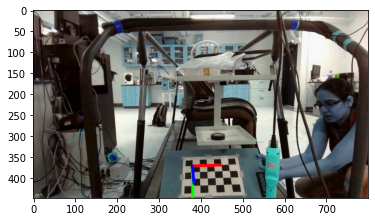

In [395]:
for fname in images2[4:5]:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (6,4),None)
#     print (corners)

    if ret == True:
        print (fname)
        plt.figure()
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
#         print ('corners2', corners2)
        # Find the rotation and translation vectors.
#         print (corners2, objp)
        _, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp_front, corners2, frontlook_mtx, frontlook_dist)
        print (rvecs, tvecs)
        #Post processing to check 
        rotM = cv2.Rodrigues(rvecs)[0]
#         print (rotM)
        cameraPosition = -np.matrix(rotM).T * np.matrix(tvecs)
        print ('Camera Position', cameraPosition)
#         print ('inliers', inliers)

        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, frontlook_mtx, frontlook_dist)
#         print(img)
#         print (corners2)
#         print ('img', imgpts)
#         print ('axis', axis)
        
        img = draw(img,corners2,imgpts)
        plt.imshow(img)
        plt.savefig(fname[:-4]+'_axis.png', dpi = 300, bbox_inches='tight', pad_inches=0)
        #plt.close()

In [396]:
print (objp_front)

[[ 43.5 280.  -25. ]
 [ 40.  280.  -25. ]
 [ 36.5 280.  -25. ]
 [ 33.  280.  -25. ]
 [ 29.5 280.  -25. ]
 [ 26.  280.  -25. ]
 [ 43.5 283.5 -22. ]
 [ 40.  283.5 -22. ]
 [ 36.5 283.5 -22. ]
 [ 33.  283.5 -22. ]
 [ 29.5 283.5 -22. ]
 [ 26.  283.5 -22. ]
 [ 43.5 287.  -19. ]
 [ 40.  287.  -19. ]
 [ 36.5 287.  -19. ]
 [ 33.  287.  -19. ]
 [ 29.5 287.  -19. ]
 [ 26.  287.  -19. ]
 [ 43.5 290.5 -16. ]
 [ 40.  290.5 -16. ]
 [ 36.5 290.5 -16. ]
 [ 33.  290.5 -16. ]
 [ 29.5 290.5 -16. ]
 [ 26.  290.5 -16. ]]


In [397]:
print (corners2)

[[[380.54745 371.61038]]

 [[397.8681  370.78693]]

 [[415.1157  369.9286 ]]

 [[432.33984 369.51105]]

 [[449.68173 368.86636]]

 [[467.1395  368.20404]]

 [[380.50122 386.3713 ]]

 [[398.18076 385.53226]]

 [[416.01425 384.95245]]

 [[433.77277 384.27097]]

 [[451.55124 383.53186]]

 [[469.35992 383.15146]]

 [[380.32693 401.9881 ]]

 [[398.4544  401.43948]]

 [[416.7462  400.91214]]

 [[435.09097 400.21768]]

 [[453.4382  399.4683 ]]

 [[471.78226 399.00055]]

 [[380.19995 418.78253]]

 [[398.85727 417.9421 ]]

 [[417.8094  417.42413]]

 [[436.63065 416.8965 ]]

 [[455.4338  416.17456]]

 [[474.36557 415.45883]]]


In [398]:
_, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp_front, corners2, frontlook_mtx, frontlook_dist)
print (rvecs, tvecs)
#Post processing to check 
rotM = cv2.Rodrigues(rvecs)[0]
#         print (rotM)
cameraPosition_front = -np.matrix(rotM).T * np.matrix(tvecs)
print ('Camera Position', cameraPosition_front)

[[ 0.04456356]
 [ 3.01837349]
 [-0.90960737]] [[  31.90938981]
 [-232.49838609]
 [ 249.25996024]]
Camera Position [[ 38.30252589]
 [330.67273516]
 [ 79.954332  ]]


In [399]:
# #Saving as .npy files 
np.save(path+'June\\frontlook\\calibrate\\frontlook_rotation_matrix', rvecs)
np.save(path+'June\\frontlook\\calibrate\\frontlook_translation_matrix', tvecs)

# Load previously saved data
frontlook_rvecs = np.load(path+'June\\frontlook\\calibrate\\frontlook_rotation_matrix.npy')
frontlook_tvecs = np.load(path+'June\\frontlook\\calibrate\\frontlook_translation_matrix.npy')

In [400]:
print ('Computed rotation vector', frontlook_rvecs)
print ('Computed translation vector', frontlook_tvecs)

Computed rotation vector [[ 0.04456356]
 [ 3.01837349]
 [-0.90960737]]
Computed translation vector [[  31.90938981]
 [-232.49838609]
 [ 249.25996024]]


In [401]:
#Post processing to check 
rotM = cv2.Rodrigues(frontlook_rvecs)[0]
print (rotM)
cameraPosition_front = -np.matrix(rotM).T * np.matrix(frontlook_tvecs)
print (cameraPosition_front)

[[-0.99953798  0.02383925 -0.01885514]
 [ 0.03028789  0.83312882 -0.55224904]
 [ 0.00254356 -0.55256498 -0.83346594]]
[[ 38.30252589]
 [330.67273516]
 [ 79.954332  ]]


### Converting 2D extracted keypoints on our data 

In [4]:
#Lower body 
# Load previously saved intrinsic and extrinsic matrices 
frontlook_mtx = np.load(path+'June\\frontlook\\calibrate\\frontlook_camera_matrix.npy')
frontlook_dist = np.load(path+'June\\frontlook\\calibrate\\frontlook_distortion_matrix.npy')
frontlook_rvecs = np.load(path+'June\\frontlook\\calibrate\\frontlook_rotation_matrix.npy')
frontlook_tvecs = np.load(path+'June\\frontlook\\calibrate\\frontlook_translation_matrix.npy')

print ('Computed camera matrix\n', frontlook_mtx)
print ('Computed distortion matrix\n', frontlook_dist)
print ('Computed rotation vector\n', frontlook_rvecs)
print ('Computed translation vector\n', frontlook_tvecs)

Computed camera matrix
 [[560.02665252   0.         402.60078829]
 [  0.         869.92913382 252.54590069]
 [  0.           0.           1.        ]]
Computed distortion matrix
 [[-4.70342049e-01  9.05259576e+00  4.59566683e-03  2.16735826e-02
  -5.32980337e+01]]
Computed rotation vector
 [[ 0.04456356]
 [ 3.01837349]
 [-0.90960737]]
Computed translation vector
 [[  31.90938981]
 [-232.49838609]
 [ 249.25996024]]


In [5]:
lower_body_indices = list(range(9, 15)) + list(range(19, 25))
order = ['right hip', 'right knee', 'right ankle', 'left hip', 'left knee', 'left ankle', 'left toe 1', 'left toe 2', \
         'left heel', 'right toe 1', 'right toe 2', 'right heel']
rotM = cv2.Rodrigues(frontlook_rvecs)[0]
frontlook_tvecs1 = frontlook_tvecs-np.array([[5], [5], [-520]])
w = 800
h = 448
for frame_num in ['2', '5', '100', '201', '1000', '1002', '1004', '1006', '1008', '1010', '1012', '1014', '1016', \
                 '1018', '1020', '1022', '1024', '1026', '1028', '1030']:
    print ('\nFrame number:', frame_num)
    frame = 'C:/Users/purpl/Box/Gait Video Project/GaitVideoData/video/openpose_data/HOA/walking/lower_body/InkedGVS_212_W_T1_1_Trim/'+frame_num+'.jpg'
    frame_csv = pd.read_csv(frame[:-3]+'csv', index_col = None)
    print (frame_csv.iloc[lower_body_indices][['x', 'y']])
    coords = frame_csv.iloc[lower_body_indices][['x', 'y']].values
    # coords = [[376.23502, 27.33691], [384.72952, 99.30068], [389.60507, 171.26672], [418.88068, 29.755245],\
    # [411.6213, 91.9736], [405.4864, 139.5583], [406.72183, 156.641], [412.8332, 154.17406], [401.84018, 140.79561], \
    #           [390.86942, 187.15799], [383.49634, 187.10332], [392.04758, 177.35179]]
    data_frame = pd.DataFrame()
    for idx, coord in enumerate(coords):
        col = coord[0]
        row = coord[1]
        u=col-w/2
        v=h/2-row
        p = np.matmul(np.linalg.pinv(frontlook_mtx), np.array([col, row, 1]))
    #     p1 = p*[0.3*frontlook_mtx[0, 0], 0.5*frontlook_mtx[1, 1], 0.4*frontlook_mtx[0, 0]] #At height 25
        if idx in [0, 3]: #Hip 
            print ('Hip')
            x = np.matmul(np.matrix(rotM).T, ([[(37+65+300)], [(37+65+500)], [(37+65+500)]]*p.reshape(-1,1) - np.matrix(frontlook_tvecs1)))
    #     x = np.matmul(np.matrix(rotM).T, (p1.reshape(-1,1) - np.matrix(frontlook_tvecs1)))
        elif idx in [1, 4]: #Knee
            x = np.matmul(np.matrix(rotM).T, ([[(37+65+300)], [(37+65+700)], [(37+65+520)]]*p.reshape(-1,1) - np.matrix(frontlook_tvecs1)))  
        else: #Ankle, Toe and Heel
            x = np.matmul(np.matrix(rotM).T, ([[(37+65+300)], [(37+65+1000)], [(37+65+590)]]*p.reshape(-1,1) - np.matrix(frontlook_tvecs1)))  
        temp_df = pd.DataFrame(np.array(x)).T
        data_frame = data_frame.append(temp_df)
    data_frame.index = order
    data_frame.columns = ['x', 'y', 'z']
    print (data_frame)


Frame number: 2
            x           y
9   362.81060   38.314655
10  373.79202  132.250640
11  387.22888  211.524110
12  422.58470   39.533672
13  415.22270  141.985950
14  417.67462  249.356230
19  410.39650  273.758420
20  423.77570  272.554050
21  416.46182  257.881130
22  383.56180  238.368120
23  376.23230  234.733670
24  395.71280  215.176040
Hip
Hip
                     x           y          z
right hip    57.723775  165.454789  91.164208
right knee   51.026775  185.707387  53.720673
right ankle  43.349063  196.359671 -37.351563
left hip     14.861926  167.180469  89.889324
left knee    21.572459  193.893795  48.203422
left ankle   22.956043  236.808026 -64.229944
left toe 1   29.114289  262.437124 -81.202537
left toe 2   19.468620  261.395002 -80.541076
left heel    24.153298  245.784302 -70.177315
right toe 1  47.010106  224.627616 -56.081260
right toe 2  52.129513  220.666456 -53.439497
right heel   37.402040  200.359034 -40.021180

Frame number: 5
            x         

In [335]:
scale_z_0_on_treadmill = 37 + 65 #treadmill_height + camera's height 
scale_z_25_on_treadmill = 37 + 65 - 25 
scale_z_0_on_treadmill, scale_z_25_on_treadmill

(102, 77)

In [421]:
[[(37+65+500)], [(37+65+500)], [(37+65+500)]]*p.reshape(-1,1)

array([[-13.92255279],
       [-62.15386871],
       [602.        ]])